<a href="https://colab.research.google.com/github/Vamshi399/STEMINSTITUTE2020/blob/master/Team5_(Silent_Assasins)STEM2020Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Team 5 - Billion Oyster Project**
**By: Ashley, Eve, Harshith, Isa, May**

**(Silent Assasins)**

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
sns.set()
import math


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Data from Ian
data = pd.read_csv('http://webpage.pace.edu/fparisi/STEM-2020/Python/bop_data_retrivedbyian.csv')
#Putting the data into a dataframe
dataset = pd.DataFrame(data)
print(dataset.shape)

#Method to convert temps in Celsius to Fahrenheit
def cToF(num):
  return round(float(num*1.8 +32), 2)

#Converting the data of average temps from Fahrenheit to Celsius
for x in range(len(dataset['waterTemperature_units'])):
  if(dataset['waterTemperature_units'][x] == 'c'):
    dataset['waterTemperature_average'][x] = cToF(dataset.iloc[x]['waterTemperature_average'])
    dataset['waterTemperature_units'][x] = 'f'

(1097, 50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Frequency and Oyster Number')

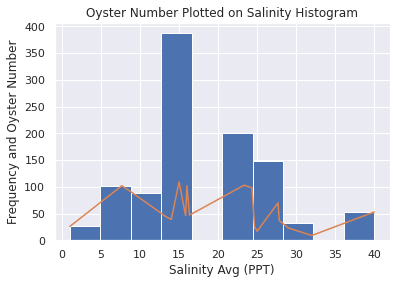

In [ ]:
#Using a subset of data for easier analysis
minidata2 = dataset[['sizeOfLiveOysterMM', 'salinity_average']]
#Cleaning out any rows with empty or invalid values
minidata2 = minidata2.dropna()


minidata2['salinity_average'].plot.hist()
#Adding Line Graph with Oyster Numbers for better visualization
print(minidata2.groupby('salinity_average').size().plot.line())
plt.title("Oyster Number Plotted on Salinity Histogram")
plt.xlabel("Salinity Avg (PPT)")
plt.ylabel("Frequency and Oyster Number")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 100.0)

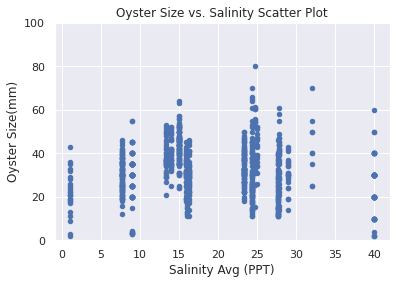

In [ ]:
#Scatter Plot for better visualization
minidata2.plot.scatter(x='salinity_average', y='sizeOfLiveOysterMM')
plt.title("Oyster Size vs. Salinity Scatter Plot")
plt.xlabel("Salinity Avg (PPT)")
plt.ylabel("Oyster Size(mm)")
plt.ylim(0, 100)

Text(0, 0.5, 'Mean Oyster Size')

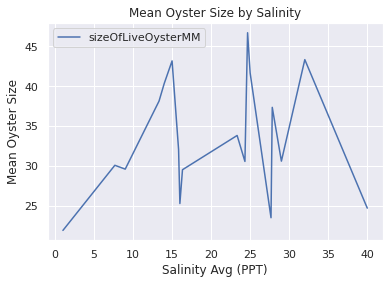

In [ ]:
#Graphing Mean Oyster Size and Salinity
minidata2.groupby('salinity_average').mean().plot.line()
plt.title("Mean Oyster Size by Salinity")
plt.xlabel("Salinity Avg (PPT)")
plt.ylabel("Mean Oyster Size")

Text(0, 0.5, 'Number of Oysters')

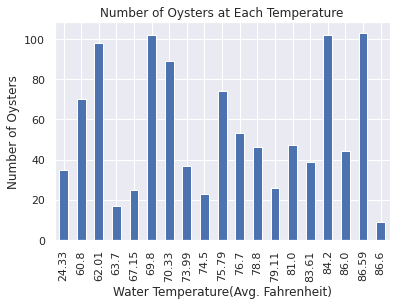

In [ ]:
#Using a smaller dataset containing data from water temp and oyster size
minidata = dataset[["waterTemperature_average", "sizeOfLiveOysterMM"]]

#Cleaning out empty data
minidata = minidata.dropna()

#How many oysters are at each temp
minidata.groupby("waterTemperature_average").size().plot.bar()
plt.title("Number of Oysters at Each Temperature")
plt.xlabel("Water Temperature(Avg. Fahrenheit)")
plt.ylabel("Number of Oysters")

{'10-20': [0], '21-30': [35], '31-40': [0], '41-50': [0], '51-60': [70], '61-70': [331], '71-80': [259], '81-90': [344]}


Text(0, 0.5, 'Number of Oysters')

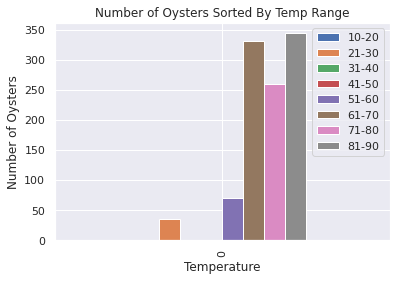

In [ ]:
#Sorting water temp sizes based on intervals
#Creating Manual Dictionary with Custom Temperature Intervals
waterAvgNum = {"10-20":[0], "21-30":[0], "31-40":[0], "41-50":[0], "51-60":[0], "61-70":[0], "71-80":[0], "81-90":[0]}
#Looping through the subset of data and adding to the created dictionary based on sorted temperature
for i in range(len(minidata)):
  num = minidata.iloc[i]["waterTemperature_average"]
  if(num < 21):
    waterAvgNum["10-20"][0]+=1
  elif(num < 31):
    waterAvgNum["21-30"][0]+=1
  elif(num < 41):
    waterAvgNum["31-40"][0]+=1
  elif(num < 51):
    waterAvgNum["41-50"][0]+=1
  elif(num < 61):
    waterAvgNum["51-60"][0]+=1
  elif(num < 71):
    waterAvgNum["61-70"][0]+=1
  elif(num < 81):
    waterAvgNum["71-80"][0]+=1
  else:
    waterAvgNum["81-90"][0]+=1
print(waterAvgNum)
waterAvgNumDF = pd.DataFrame(waterAvgNum)
waterAvgNumDF.plot.bar()
#Customizing plot
plt.title("Number of Oysters Sorted By Temp Range")
plt.xlabel("Temperature")
plt.ylabel("Number of Oysters")


{'10-20': [], '21-30': [52.0, 39.0, 36.0, 43.0, 46.0, 35.0, 42.0, 46.0, 40.0, 64.0, 51.0, 47.0, 44.0, 47.0, 50.0, 34.0, 42.0, 46.0, 63.0, 52.0, 48.0, 52.0, 53.0, 43.0, 39.0, 46.0, 37.0, 45.0, 45.0, 54.0, 25.0, 51.0, 40.0, 45.0, 44.0], '31-40': [], '41-50': [], '51-60': [35.0, 39.0, 31.0, 39.0, 33.0, 37.0, 36.0, 39.0, 28.0, 27.0, 25.0, 11.0, 12.0, 15.0, 20.0, 11.0, 24.0, 15.0, 19.0, 29.0, 22.0, 27.0, 23.0, 15.0, 26.0, 38.0, 16.0, 15.0, 25.0, 12.0, 19.0, 12.0, 30.0, 18.0, 25.0, 11.0, 32.0, 29.0, 20.0, 27.0, 46.0, 32.0, 35.0, 28.0, 14.0, 12.0, 18.0, 16.0, 15.0, 40.0, 40.0, 35.0, 29.0, 23.0, 21.0, 19.0, 21.0, 22.0, 13.0, 17.0, 15.0, 11.0, 13.0, 14.0, 12.0, 15.0, 28.0, 37.0, 18.0, 20.0], '61-70': [21.0, 22.0, 27.0, 25.0, 29.0, 34.0, 20.0, 22.0, 21.0, 20.0, 25.0, 25.0, 23.0, 32.0, 20.0, 41.0, 31.0, 40.0, 37.0, 27.0, 32.0, 26.0, 40.0, 33.0, 18.0, 32.0, 24.0, 31.0, 20.0, 18.0, 18.0, 35.0, 40.0, 37.0, 27.0, 37.0, 28.0, 13.0, 19.0, 26.0, 22.0, 22.0, 35.0, 26.0, 34.0, 20.0, 11.0, 12.0, 22.0, 20.0

Text(0, 0.5, 'Oyster Size Mean')

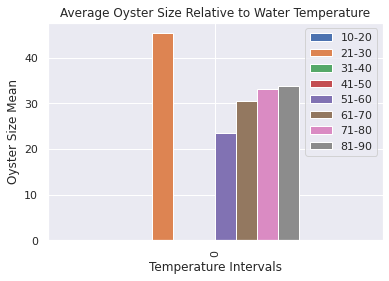

In [ ]:
#Another Manual Dictionary but this time to find the average oyster size in each temperature interval
waterAvg = {"10-20":[], "21-30":[], "31-40":[], "41-50":[], "51-60":[], "61-70":[], "71-80":[], "81-90":[]}
#Looping through and adding all of the oyster sizes in the corresponding temperature intervals
for i in range(len(minidata)):
  num = minidata.iloc[i]["waterTemperature_average"]
  num2 = minidata.iloc[i]["sizeOfLiveOysterMM"]
  if(num < 21):
    waterAvg["10-20"].append(num2)
  elif(num < 31):
    waterAvg["21-30"].append(num2)
  elif(num < 41):
    waterAvg["31-40"].append(num2)
  elif(num < 51):
    waterAvg["41-50"].append(num2)
  elif(num < 61):
    waterAvg["51-60"].append(num2)
  elif(num < 71):
    waterAvg["61-70"].append(num2)
  elif(num < 81):
    waterAvg["71-80"].append(num2)
  else:
    waterAvg["81-90"].append(num2)
print(waterAvg)

#Calculating Mean Method to avoid Repetition
def calcMean(interval):
  a = []
  count=0
  sum=0
  if(waterAvg[interval] == a):
    return 0
  for i in waterAvg[interval]:
    count+=1
    sum+=i
  return (sum/count)

#Looping through and finding mean of oyster sizes in each temperature interval
for s in waterAvg.keys():
  m = calcMean(s)
  waterAvg[s].clear()
  waterAvg[s].append(m)

#Converting data into dataframe and creating a bar graph
newframe= pd.DataFrame(waterAvg)
newframe.plot.bar()
plt.title("Average Oyster Size Relative to Water Temperature")
plt.xlabel("Temperature Intervals")
plt.ylabel("Oyster Size Mean")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Size of Oysters')

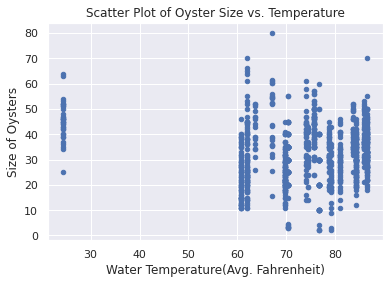

In [ ]:
#Scatter Plot with Temp and Oyster Size for visualization
dataset.plot.scatter(x='waterTemperature_average', y='sizeOfLiveOysterMM')
plt.title("Scatter Plot of Oyster Size vs. Temperature")
plt.xlabel("Water Temperature(Avg. Fahrenheit)")
plt.ylabel("Size of Oysters")

Text(0.5, 1.0, 'Water Temperature Histogram')

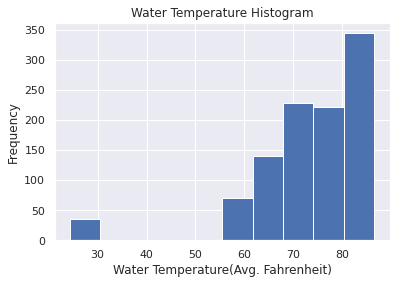

In [ ]:
minidata['waterTemperature_average'].plot.hist()
plt.xlabel("Water Temperature(Avg. Fahrenheit)")
plt.title("Water Temperature Histogram")

Text(0.5, 1.0, 'Oyster Size Histogram')

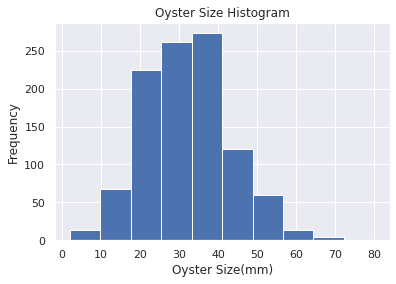

In [ ]:
minidata['sizeOfLiveOysterMM'].plot.hist()
plt.xlabel("Oyster Size(mm)")
plt.title("Oyster Size Histogram")

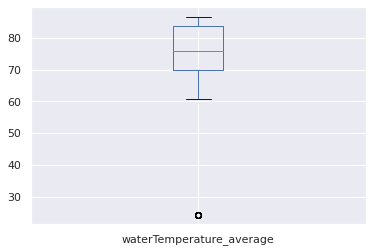

In [ ]:
dataset["waterTemperature_average"].plot.box()


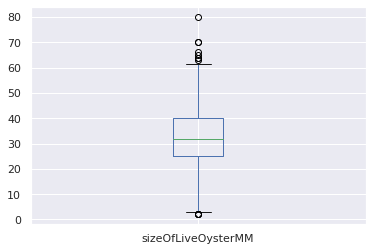

In [ ]:
dataset["sizeOfLiveOysterMM"].plot.box()


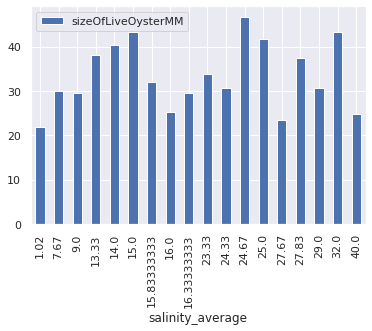

In [ ]:
dataset["salinity_average"] = dataset["salinity_average"].astype(float)
dataset[["salinity_average", "sizeOfLiveOysterMM"]].groupby("salinity_average").mean().plot.bar()
#type(dataset["pH_results_1"].values())

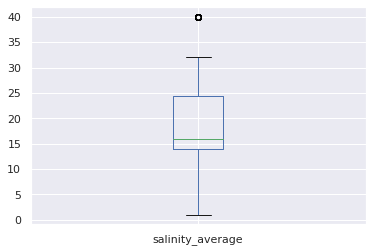

In [ ]:
dataset["salinity_average"].plot.box()

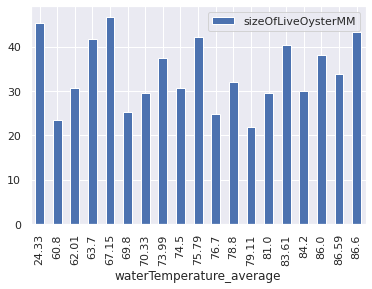

In [ ]:
minidata.groupby("waterTemperature_average").mean().plot.bar()

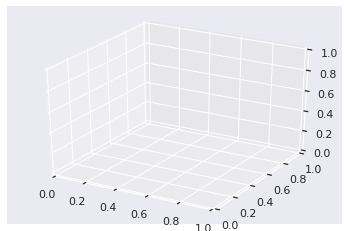

In [ ]:
minidata3 = dataset[['sizeOfLiveOysterMM', 'salinity_average', 'waterTemperature_average']]

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
#threedee.line(minidata3['sizeOfLiveOysterMM'], minidata3['salinity_average'], minidata3['waterTemperature_average'])